# Bellman Ford Algorithim

Refer to the 2P8 RL notes for more theoretical details. The bellman ford algorithim is another algorithim used for finding shortest path problems

We demo the following graph, used in the 2P8 notes

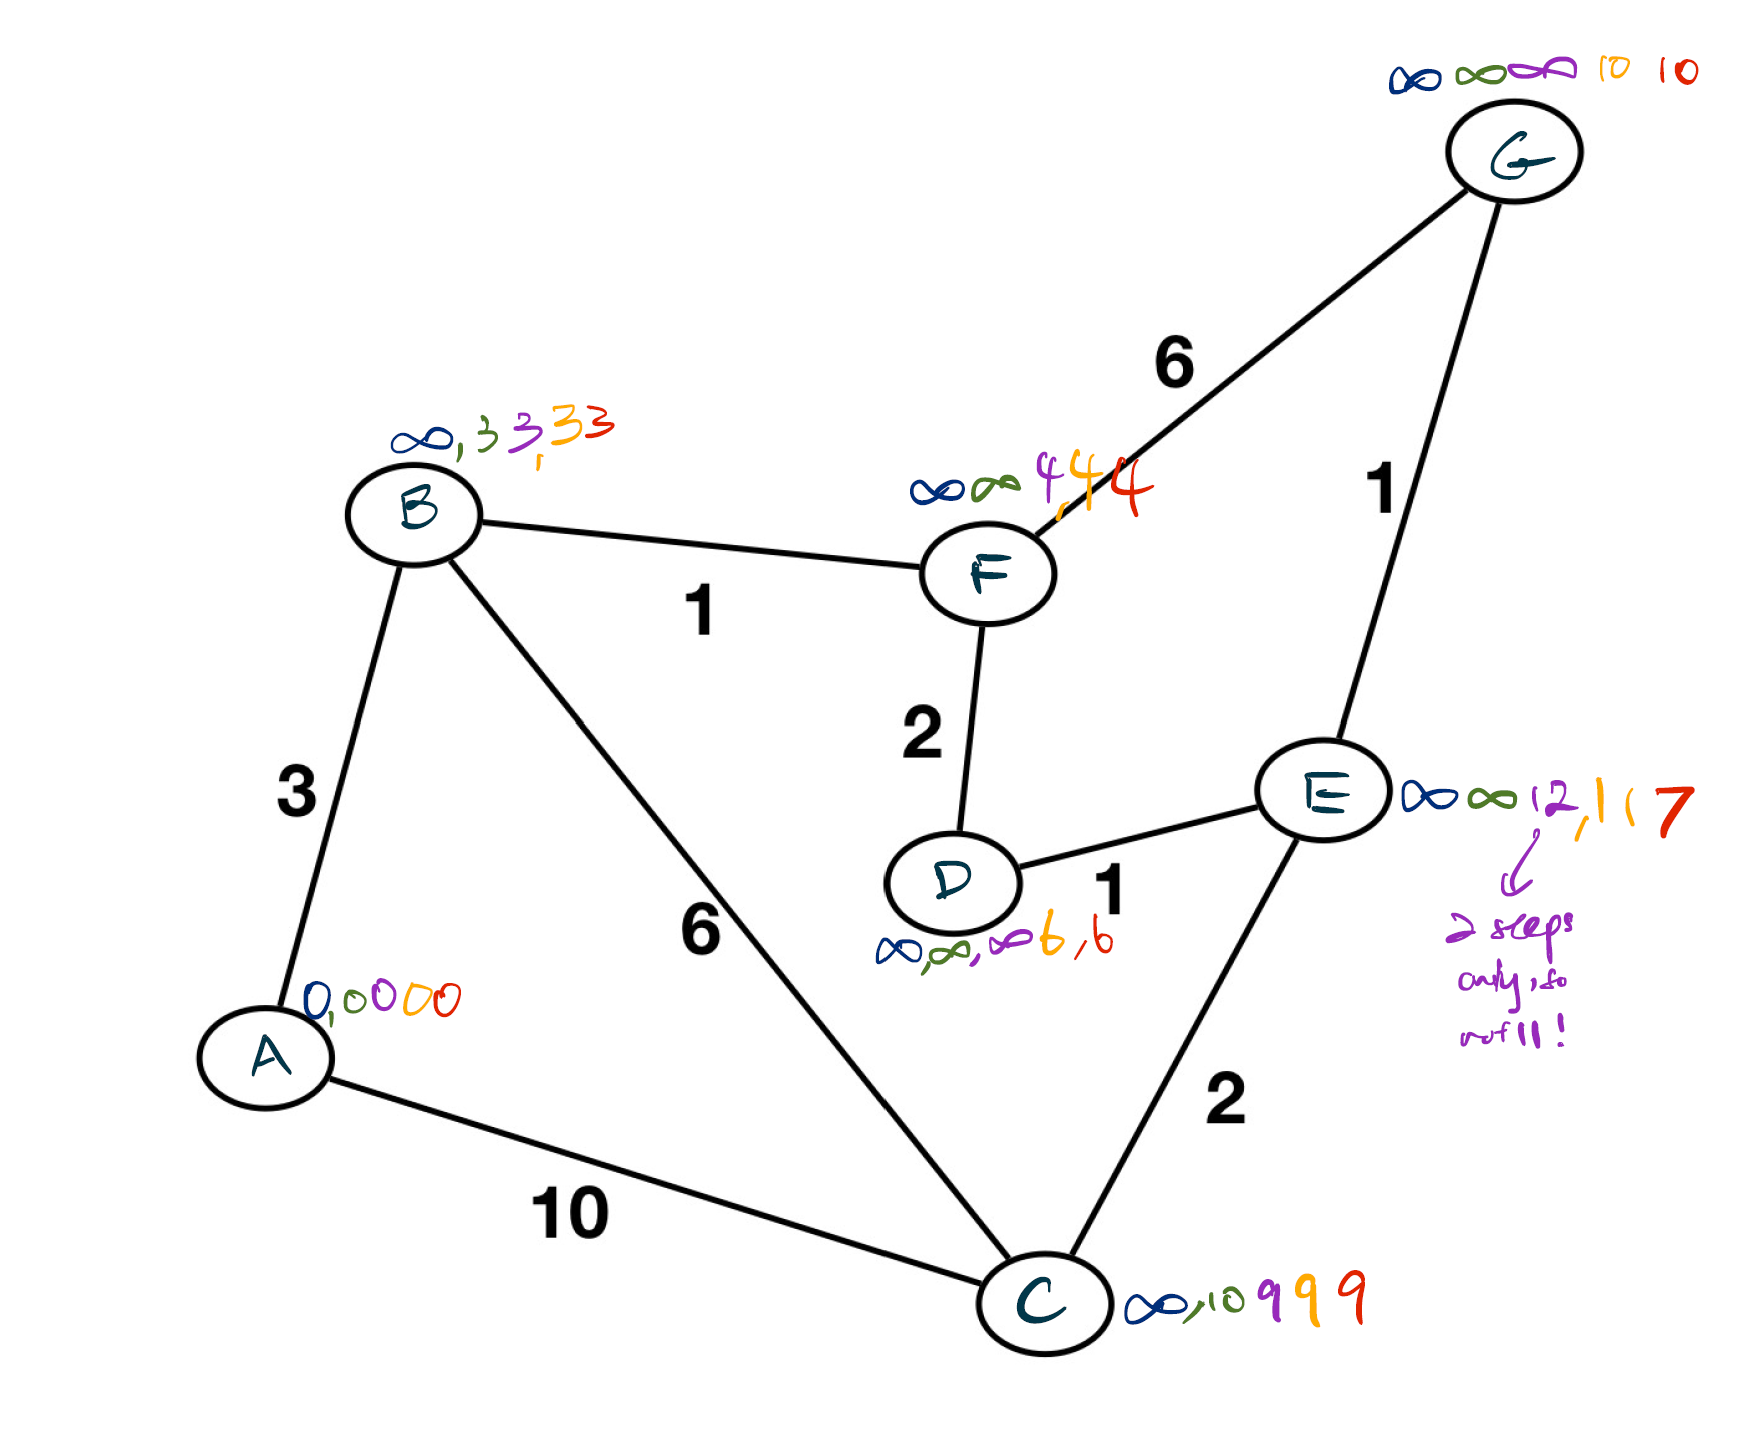

In [ ]:
# ITERATIVE BELLMAN-FORD
def bellman_ford_iterative(graph, dest):
    """
    Find shortest paths from all nodes to destination using Bellman-Ford
    graph: dict {node: [(neighbor, weight), ...]}
    dest: destination node
    returns: dict {node: shortest_distance_to_dest}
    """
    nodes = list(graph.keys())
    n = len(nodes)

    # Initialize: dist(dest) = 0, dist(others) = ∞
    # prev_dist tracks the distances from the previous iteration k-1!
    prev_dist = {u: 0 if u == dest else float("inf") for u in nodes}

    # Iterate k = 1 to N-1
    for k in range(1, n):
        # restart all the new distances for this new round of k
        curr_dist = {}
        # go through all the nodes
        for u in nodes:
            if u == dest:
                # hit the dest node
                curr_dist[u] = 0
            else:
                # dist_k(u) = min over neighbors v of (weight(u,v) + dist_{k-1}(v))
                curr_dist[u] = min(
                    weight + prev_dist[neighbor] for neighbor, weight in graph[u]
                )

        # update the previous iteration values
        prev_dist = curr_dist

    return prev_dist


In [12]:
# RECURSIVE BELLMAN-FORD
def bellman_ford_recursive(graph, dest):
    """
    Recursive implementation with memoization
    """
    nodes = list(graph.keys())
    n = len(nodes)
    memo = {}

    # k here represents our iteration; how many steps away from dest we are at
    def dist(u, k):
        # Memoization
        if (u, k) in memo:
            return memo[(u, k)]

        # Base case: k = 0
        if k == 0:
            result = 0 if u == dest else float("inf")
        # Recursive case: k > 0
        else:
            if u == dest:
                result = 0
            else:
                result = min(
                    weight + dist(neighbor, k - 1) for neighbor, weight in graph[u]
                )

        memo[(u, k)] = result
        return result

    # Return distances after N-1 iterations
    return {u: dist(u, n - 1) for u in nodes}

In [13]:
graph = {
    "A": [("B", 3), ("C", 10)],
    "B": [("F", 1), ("C", 6), ("A", 3)],
    "C": [("A", 10), ("B", 6), ("E", 2)],
    "D": [("E", 1), ("F", 2)],
    "E": [("C", 2), ("D", 1), ("G", 1)],
    "F": [("B", 1), ("D", 2), ("G", 6)],
    "G": [("F", 6), ("E", 1)],
}

dest = "A"  # Based on your colored annotations

print("=== BELLMAN-FORD TO DESTINATION ===")
print("\nIterative result:")
iter_result = bellman_ford_iterative(graph, dest)
for node in sorted(iter_result.keys()):
    print(f"  {node} : {iter_result[node]}")

print("\nRecursive result:")
rec_result = bellman_ford_recursive(graph, dest)
for node in sorted(rec_result.keys()):
    print(f"  {node} : {rec_result[node]}")

=== BELLMAN-FORD TO DESTINATION ===

Iterative result:
  A : 0
  B : 3
  C : 9
  D : 6
  E : 7
  F : 4
  G : 8

Recursive result:
  A : 0
  B : 3
  C : 9
  D : 6
  E : 7
  F : 4
  G : 8
